In [58]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import *

# import basic plot tools
from qiskit.visualization import plot_histogram


from qiskit.providers.fake_provider import FakeJakarta

from qiskit.providers.fake_provider import FakeNairobi

In [27]:
#defining  a function to create the DJ Algorithm circuit. Function takes in the oracle and number or qubits and 
# ouputs the circuit 

def DJ_algo(oracle,n):
    
    # n input qubits and 1 helper qubit
    qc = QuantumCircuit(n+1,n)
    
    # helper qubit initialised to state ket_1
    qc.x(n)
    
    # creating superposition of all the inputs. and making the state of the helper qubit as ket_minus. 
    for i in range(n+1):
        qc.h(i)
    qc.barrier()
    
    # applying the oracle that has the funciton encoded in it to the circuit 
    qc.append(oracle, range(n+1))
    qc.barrier()
    
    #applying the hadamard gates again to collapse the superposition to one state that has the final result 
    #encoded in it. 
    for i in range(n):
        qc.h(i)
    
    # measuring the input qubits to find the final result. 
    qc.measure(range(n),range(n))
    
    return (qc)
    
    

In [54]:
# The oracle is defined below

def dj_oracle(n:int, type:str):
    
    #define a quantum circuit with n input qubits and 1 helper qubits 
    qc = QuantumCircuit(n+1)

    #create an oracle based on whether balanced or constant function
    if(type == 'balanced'):
        
        #balanced oracle flips helper when the 0th qubit is 1 half the inputs will have 0th qubit 1 rest 
        # half will have 0th qubit 0. 
        qc.cx(0,n)
    else:
        #apply identity on the n+1 bit
        qc.i(n)

    #convert to gate
    _gate_oracle = qc.to_gate()
    if (type == 'balanced'):
        _gate_oracle.name = "oracle_balanced"
    else:
        _gate_oracle.name = "oracle_constant"

    # return the gate
    return _gate_oracle




In [77]:
# Testing the algorithm for n=3 and constant function

n = 2
oracle  = dj_oracle(n, 'constant')



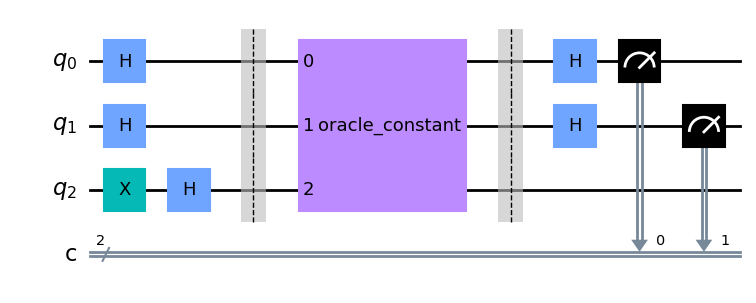

In [78]:
q1 = DJ_algo(oracle, n)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


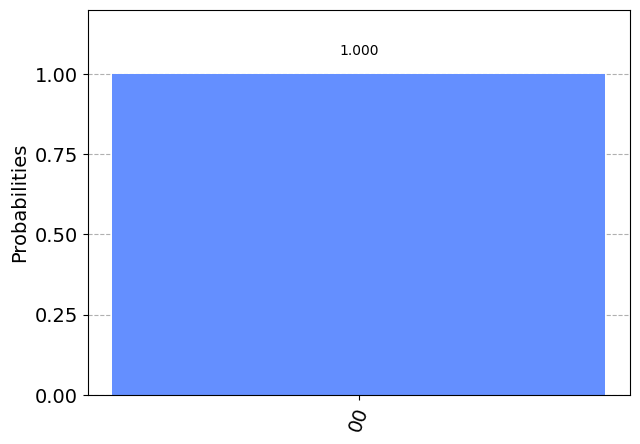

In [79]:
backend = Aer.get_backend('aer_simulator')

transpiled =transpile(q1, backend)

job= execute(transpiled, backend)
results= job.result()
counts = results.get_counts()
plot_histogram(counts)

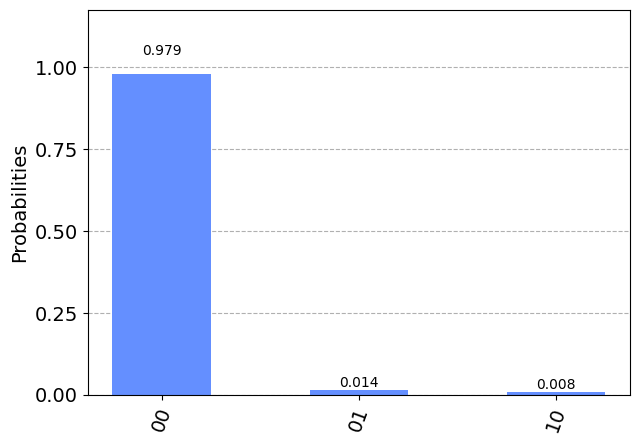

In [80]:
# Running on noisy simulator

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

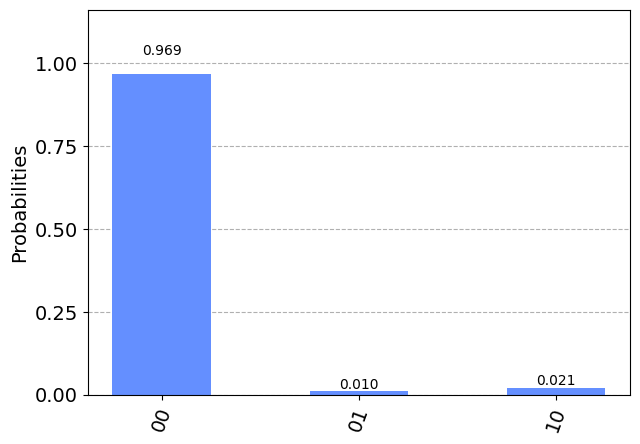

In [81]:
# Running on noisy simulator

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [72]:
# Testing the algorithm for n=3 and constant function

n = 6
oracle  = dj_oracle(n, 'balanced')




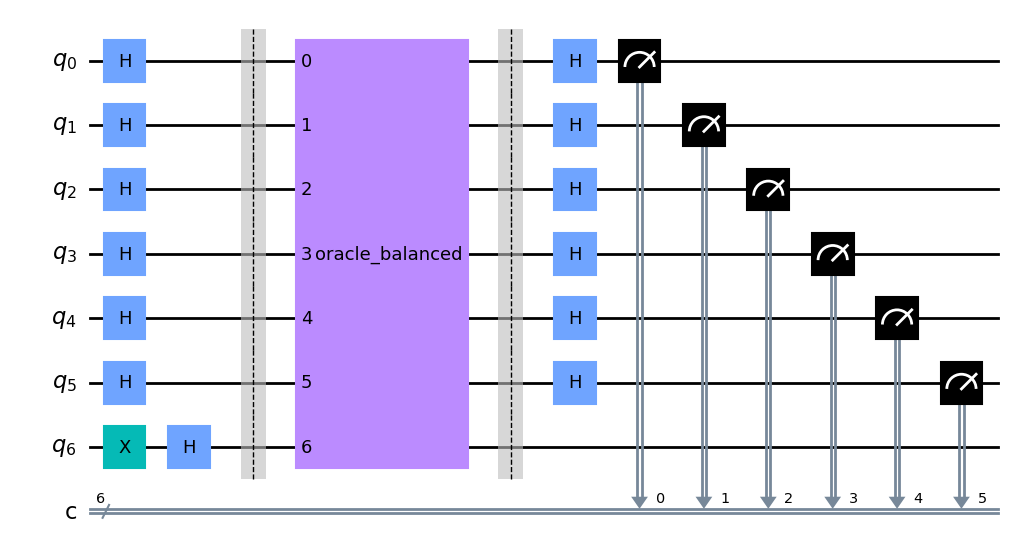

In [73]:
q1 = DJ_algo(oracle, n)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


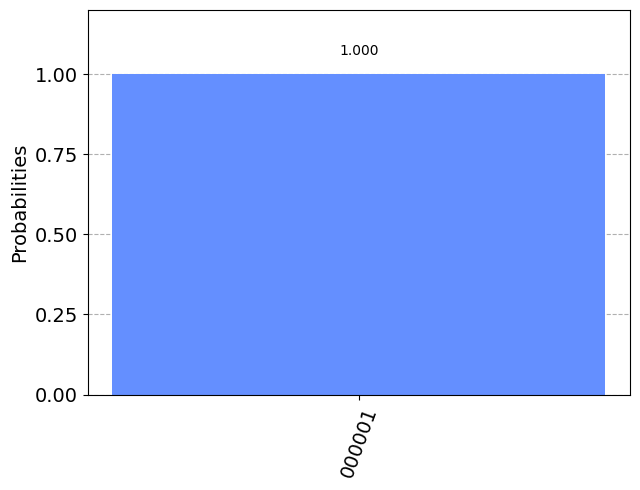

In [74]:
backend = Aer.get_backend('aer_simulator')

transpiled =transpile(q1, backend)

job= execute(transpiled, backend)
results= job.result()
counts = results.get_counts()
plot_histogram(counts)

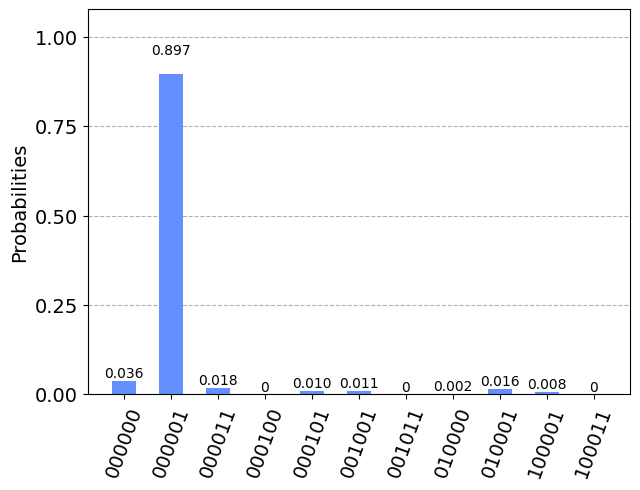

In [75]:
# Running on noisy simulator

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

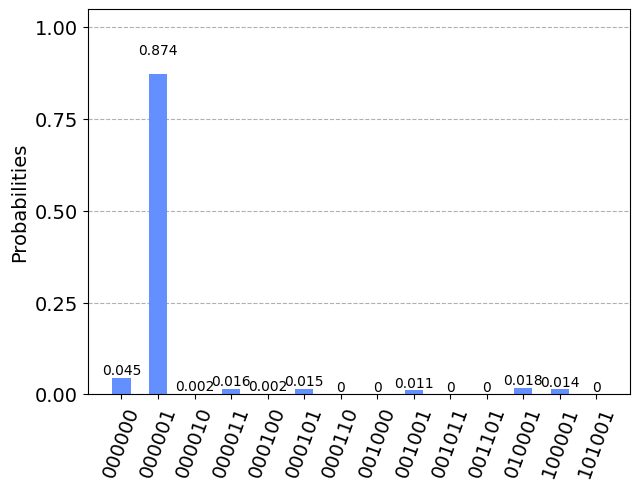

In [76]:
# Running on noisy simulator

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)